<a href="https://colab.research.google.com/github/tamdoancong/5215-MachineLearning-Doan/blob/master/TamDoanW7LogisticRegressionEdit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
#import libraries
import random
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression,Perceptron
from sklearn.metrics import mean_squared_error, r2_score
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
pd.options.display.max_rows=12
plt.rcParams.update({'font.size': 18})

In [553]:
#Suleyman code
def plot_hyperplane(ax1,c,color,clf,xmin,xmax):
    coef = clf.coef_
    intercept = clf.intercept_
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    ax1.plot([xmin, xmax], [line(xmin), line(xmax)],
                ls="--", color=color)

In [554]:
##Suleyman code
def decision_point(clf):
    coef = clf.coef_
    intercept = clf.intercept_
    return (-intercept[0])/coef[0,0]

In [555]:
#download the data
!git clone https://github.com/sopolat/HomeworkFiles.git

fatal: destination path 'HomeworkFiles' already exists and is not an empty directory.


In [556]:
#load training dataframes
sl_c = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl.c.train.csv")
sl_pl = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl.pl.train.csv")
sl_pw_c = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl_pw.c.train.csv")
sl_pw_pl = pd.read_csv("/content/HomeworkFiles/iris/train/iris_versicolor_vs_virginica.sl_pw.pl.train.csv")
#load dev set
sl_c_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl.c.tune.csv")
sl_pl_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl.pl.tune.csv")
sl_pw_c_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl_pw.c.tune.csv")
sl_pw_pl_d = pd.read_csv("/content/HomeworkFiles/iris/tune/iris_versicolor_vs_virginica.sl_pw.pl.tune.csv")

In [557]:
#update class labels
sl_c.loc[sl_c["iris class"]=="Iris-virginica","iris class"]=1
sl_c.loc[sl_c["iris class"]=="Iris-versicolor","iris class"]=0
sl_c["iris class"]=sl_c["iris class"].astype('int')

sl_pw_c.loc[sl_pw_c["iris class"]=="Iris-virginica","iris class"]=1
sl_pw_c.loc[sl_pw_c["iris class"]=="Iris-versicolor","iris class"]=0
sl_pw_c["iris class"]=sl_pw_c["iris class"].astype('int')


sl_c_d.loc[sl_c_d["iris class"]=="Iris-virginica","iris class"]=1
sl_c_d.loc[sl_c_d["iris class"]=="Iris-versicolor","iris class"]=0
sl_c_d["iris class"]=sl_c_d["iris class"].astype('int')

sl_pw_c_d.loc[sl_pw_c_d["iris class"]=="Iris-virginica","iris class"]=1
sl_pw_c_d.loc[sl_pw_c_d["iris class"]=="Iris-versicolor","iris class"]=0
sl_pw_c_d["iris class"]=sl_pw_c_d["iris class"].astype('int')

In [558]:
sl_pw_c_d


,sepal length,petal width,iris class
0,6.7,1.7,0
1,6.1,1.4,1
2,5.5,1.0,0
3,5.8,1.2,0
4,6.4,1.3,0
...,...,...,...
45,6.1,1.2,0
46,5.5,1.3,0
47,6.4,2.1,1
48,6.2,1.5,0


In [559]:
X=sl_pw_c_d.drop('iris class',axis=1)
X['x0']=1
X=X[['x0','sepal length','petal width']]
X


,x0,sepal length,petal width
0,1,6.7,1.7
1,1,6.1,1.4
2,1,5.5,1.0
3,1,5.8,1.2
4,1,6.4,1.3
...,...,...,...
45,1,6.1,1.2
46,1,5.5,1.3
47,1,6.4,2.1
48,1,6.2,1.5


In [560]:
#initial weight 
w=[]
for i in range(0,len(X.columns)):

  w.append(random.random())
w

[0.8946747073541108, 0.10613503475564912, 0.06958524931869392]

In [561]:
def Fx2(x1):
  
  x2 = -(w[0] + w[1] * x1) / w[2]
  return  x2

In [562]:
x1=sl_pw_c_d['sepal length']

In [563]:
Fx2(x1)

0    -23.076434
1    -22.161283
2    -21.246132
3    -21.703708
4    -22.618859
        ...    
45   -22.161283
46   -21.246132
47   -22.618859
48   -22.313808
49   -23.076434
Name: sepal length, Length: 50, dtype: float64

In [564]:
class1 = sl_pw_c_d[sl_pw_c_d['iris class'] == 1 ]
class0 = sl_pw_c_d[sl_pw_c_d['iris class'] == 0 ]

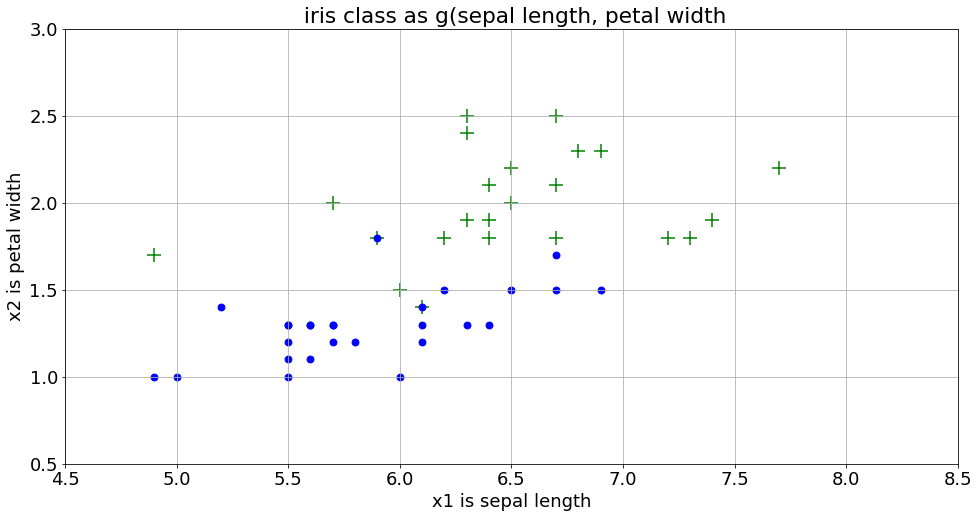

In [565]:
fig, (g) = plt.subplots(1, figsize=(16, 8))
plt.scatter(class1['sepal length'], class1['petal width'], marker= "+", c= "green",s=188 )
plt.scatter(class0['sepal length'], class0['petal width'], marker= ".", c= "blue",s=188 )

g.set_xlim(4.5,8.5)
g.set_ylim(.5,3)
g.grid(True)
x1 = np.linspace(4.5, 8.5, 1000)
plt.plot(x1, Fx2(x1),color='red', marker="_");
plt.xlabel("x1 is sepal length")
plt.ylabel("x2 is petal width")
plt.title(" iris class as g(sepal length, petal width")
plt.show()

In [566]:
model=LogisticRegression()


In [567]:
model.fit(sl_pw_c.drop(['iris class'],axis=1),sl_pw_c['iris class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [568]:
p=model.predict_proba(sl_pw_c_d.drop('iris class',axis=1))
p[:,1]

array([0.6068585 , 0.27654967, 0.0658971 , 0.14105357, 0.2691448 ,
       0.16825156, 0.41940582, 0.61313587, 0.14563657, 0.94049831,
       0.75863368, 0.89570276, 0.32013653, 0.15034242, 0.11271281,
       0.46156585, 0.08647867, 0.84984294, 0.77586448, 0.2485376 ,
       0.615727  , 0.22171074, 0.50428291, 0.09348364, 0.15661195,
       0.57451045, 0.90756101, 0.15661195, 0.13099917, 0.09765459,
       0.04396404, 0.92015442, 0.68255396, 0.25264553, 0.76063075,
       0.04050391, 0.67441219, 0.66372697, 0.83498764, 0.16825156,
       0.91449508, 0.94195791, 0.51087805, 0.51087805, 0.27654967,
       0.17511401, 0.14563657, 0.79473391, 0.35847899, 0.83347511])

In [569]:
#y= sl_pw_c_d['iris class'].to_numpy()
#X=X.to_numpy()

In [570]:
gx=np.dot(X,w)

In [571]:
py1=1/(1+ np.exp(-gx))
py1

array([0.8486529 , 0.83746931, 0.82462506, 0.83114448, 0.84082773,
       0.83063091, 0.84408343, 0.83737362, 0.82762363, 0.86587891,
       0.84860775, 0.84945463, 0.8369712 , 0.82404491, 0.82662864,
       0.84685669, 0.82562912, 0.85038705, 0.85750424, 0.8224494 ,
       0.84542923, 0.83651993, 0.8495894 , 0.82715183, 0.82913252,
       0.84263492, 0.8552566 , 0.82913252, 0.82964971, 0.8321679 ,
       0.81681785, 0.85034233, 0.84633637, 0.83940212, 0.85620244,
       0.81522445, 0.84954449, 0.84495099, 0.85963792, 0.83063091,
       0.85656553, 0.85566507, 0.83836663, 0.83836663, 0.83746931,
       0.83556609, 0.82762363, 0.84813759, 0.83984696, 0.85219335])

In [572]:
error=y-py1
error

array([-0.8486529 ,  0.16253069, -0.82462506, -0.83114448, -0.84082773,
       -0.83063091, -0.84408343,  0.16262638, -0.82762363,  0.13412109,
        0.15139225,  0.15054537,  0.1630288 , -0.82404491, -0.82662864,
       -0.84685669, -0.82562912,  0.14961295,  0.14249576,  0.1775506 ,
        0.15457077, -0.83651993, -0.8495894 , -0.82715183, -0.82913252,
        0.15736508,  0.1447434 , -0.82913252, -0.82964971, -0.8321679 ,
       -0.81681785,  0.14965767,  0.15366363, -0.83940212,  0.14379756,
       -0.81522445,  0.15045551,  0.15504901,  0.14036208, -0.83063091,
        0.14343447,  0.14433493,  0.16163337, -0.83836663, -0.83746931,
       -0.83556609, -0.82762363,  0.15186241, -0.83984696,  0.14780665])

In [573]:
def Logistic_update_w(X,w,y,learning_rate,num,a):
  y=y.to_numpy()
  X=X.to_numpy()
  gx=np.dot(X,w)
  py1=1/(1+ np.exp(-gx))
  error=y-py1
  temperror=[0]
  for i in range(num):
    if np.absolute(((error-temperror).sum())/len(error))>a:
      temperror=error
      w+=np.dot(learning_rate*error,X)
      gx=np.dot(X,w)
      py1=1/(1+ np.exp(-gx))
      error=y-py1
      
  return w

In [574]:
y= sl_pw_c_d['iris class']
X=X

In [575]:
Logistic_update_w(X,w,y,.01,100,.0001)

array([-0.49279391, -0.8180436 ,  6.06607192])